In [1]:
import import_ipynb

In [2]:
import function

importing Jupyter notebook from function.ipynb


Using TensorFlow backend.



# Executando as funções

## Limpeza e Padronização

In [3]:
# Acessando os dados:
dados_mglu3 = function.leitura('/home/giovana/ic-giovana-moraes/Implementações/Projeto/Dados/sITE/MGLU3.SA.csv')
dados_petr4 = function.leitura('/home/giovana/ic-giovana-moraes/Implementações/Projeto/Dados/sITE/PETR4.SA.csv')
dados_itub4 = function.leitura('/home/giovana/ic-giovana-moraes/Implementações/Projeto/Dados/sITE/ITUB4.SA.csv')

In [4]:
# Removendo valores discrepantes ('Nan', 'null', '0.0'):
dados_mglu3 = function.removendo_valores_discrepantes(dados_mglu3)
dados_petr4 = function.removendo_valores_discrepantes(dados_petr4)
dados_itub4 = function.removendo_valores_discrepantes(dados_itub4)

In [5]:
# Removendo dados duplicados:
dados_mglu3 = function.removendo_dados_duplicados(dados_mglu3)
dados_petr4 = function.removendo_dados_duplicados(dados_petr4)
dados_itub4 = function.removendo_dados_duplicados(dados_itub4)

In [7]:
# Removendo a coluna data:
dados_mglu3 = function.remover_coluna_date(dados_mglu3)
dados_petr4 = function.remover_coluna_date(dados_petr4)
dados_itub4 = function.remover_coluna_date(dados_itub4)

## Indicadores técnicos

In [9]:
# Calculando a média móvel simples e classificando o indicador técnico:
dados_mglu3 = function.MMS(dados_mglu3, 10)
dados_petr4 = function.MMS(dados_petr4, 10)
dados_itub4 = function.MMS(dados_itub4, 10)

In [10]:
# Calculando a média móvel exponencial e classificando o indicador técnico:
dados_mglu3 = function.MME(dados_mglu3, 10)
dados_petr4 = function.MME(dados_petr4, 10)
dados_itub4 = function.MME(dados_itub4, 10)

In [11]:
# Calculando a MACD e classificando o indicador técnico:
dados_mglu3 = function.MACD(dados_mglu3)
dados_petr4 = function.MACD(dados_petr4)
dados_itub4 = function.MACD(dados_itub4)

In [12]:
# Calculando o Índice de Força Relativa e classificando o indicador técnico:
dados_mglu3 = function.RSI(dados_mglu3, 10)
dados_petr4 = function.RSI(dados_petr4, 10)
dados_itub4 = function.RSI(dados_itub4, 10)

## Criando o conjunto com os indicadores e targets de treinamento:

In [13]:
indicadores_mglu3_treinamento = function.conjunto_indicadores_treinamento(dados_mglu3)
indicadores_petr4_treinamento = function.conjunto_indicadores_treinamento(dados_petr4)
indicadores_itub4_treinamento = function.conjunto_indicadores_treinamento(dados_itub4)

In [15]:
target_mglu3_treinamento = function.target_treinamento(dados_mglu3)
target_petr4_treinamento = function.target_treinamento(dados_petr4)
target_itub4_treinamento = function.target_treinamento(dados_itub4)

## Criando o conjunto com os indicadores e targets de teste:

In [17]:
indicadores_mglu3_teste = function.conjunto_indicadores_teste(dados_mglu3)
indicadores_petr4_teste = function.conjunto_indicadores_teste(dados_petr4)
indicadores_itub4_teste = function.conjunto_indicadores_teste(dados_itub4)

In [19]:
target_mglu3_teste= function.target_teste(dados_mglu3)
target_petr4_teste= function.target_teste(dados_petr4)
target_itub4_teste= function.target_teste(dados_itub4)

## Normalizando os dados

* treinamento

In [21]:
indicadores_mglu3_treinamento = function.normalizador(indicadores_mglu3_treinamento)
indicadores_petr4_treinamento = function.normalizador(indicadores_petr4_treinamento)
indicadores_itub4_treinamento = function.normalizador(indicadores_itub4_treinamento)

In [22]:
target_mglu3_treinamento= function.normalizador(target_mglu3_treinamento)
target_petr4_treinamento= function.normalizador(target_petr4_treinamento)
target_itub4_treinamento= function.normalizador(target_itub4_treinamento)

In [23]:
target_mglu3_treinamento= function.reshape_target(target_mglu3_treinamento)
target_petr4_treinamento= function.reshape_target(target_petr4_treinamento)
target_itub4_treinamento= function.reshape_target(target_itub4_treinamento)

* teste

In [24]:
indicadores_mglu3_teste = function.normalizador(indicadores_mglu3_teste)
indicadores_petr4_teste = function.normalizador(indicadores_petr4_teste)
indicadores_itub4_teste = function.normalizador(indicadores_itub4_teste)

In [25]:
target_mglu3_teste= function.normalizador(target_mglu3_teste)
target_petr4_teste= function.normalizador(target_petr4_teste)
target_itub4_teste= function.normalizador(target_itub4_teste)

In [26]:
target_mglu3_teste= function.reshape_target(target_mglu3_teste)
target_petr4_teste= function.reshape_target(target_petr4_teste)
target_itub4_teste= function.reshape_target(target_itub4_teste)

### Modelos

In [29]:
mod1_mglu3 = function.modelo_SVM(1.0, 'rbf',0.1, indicadores_mglu3_treinamento, target_mglu3_treinamento, indicadores_mglu3_teste)
mod1_petr4 = function.modelo_SVM(1.0, 'rbf',0.1, indicadores_petr4_treinamento, target_petr4_treinamento, indicadores_petr4_teste)
mod1_itub4 = function.modelo_SVM(1.0, 'rbf',0.1, indicadores_itub4_treinamento, target_itub4_treinamento, indicadores_itub4_teste)

In [30]:
prev1_mglu3, prob1_mglu3= mod1_mglu3[0], mod1_mglu3[1]

Falsos positivo - fp: 33
Verdadeiros positivo - tp: 415
Falsos negativo - fn: 31
Verdadeiros negativo  - tn: 227
Recall: 0.93
F1-score: 0.93
Precisão: 0.93
Acurácia: 0.91
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

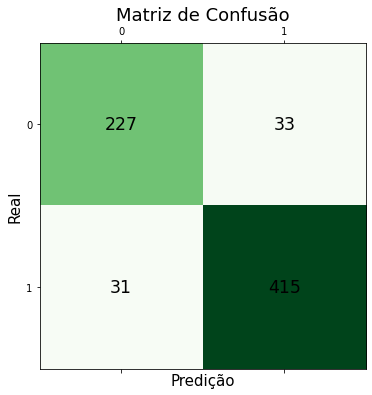

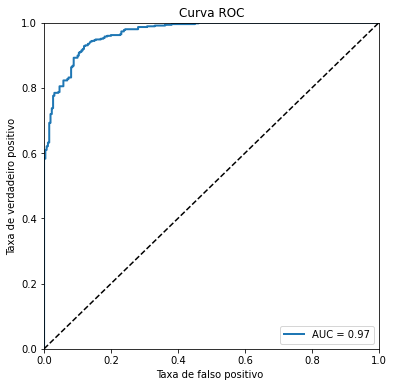

In [31]:
relatorio_mod1_mglu3 = function.relatorio(mod1_mglu3[0], target_mglu3_teste,  mod1_mglu3[1], '10d_mod1_mglu3_svm.png', 'mtz_10d_mod1_mglu3_svm.png')
relatorio_mod1_mglu3

Falsos positivo - fp: 34
Verdadeiros positivo - tp: 344
Falsos negativo - fn: 37
Verdadeiros negativo  - tn: 284
Recall: 0.9
F1-score: 0.91
Precisão: 0.91
Acurácia: 0.9
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

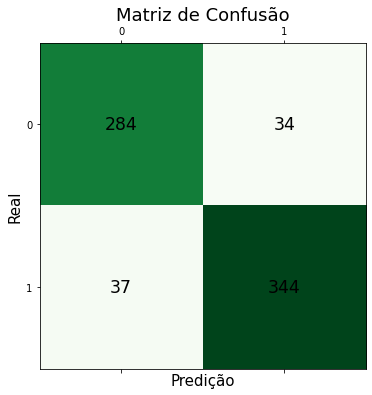

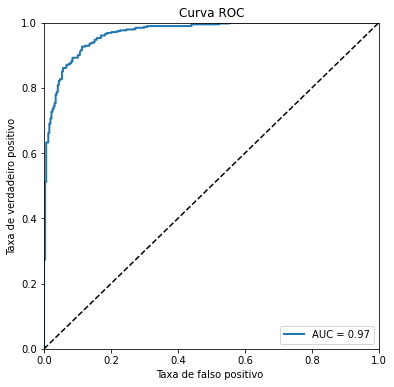

In [32]:
relatorio_mod1_petr4 = function.relatorio(mod1_petr4[0], target_petr4_teste,  mod1_petr4[1], '10d_mod1_petr4_svm.png', 'mtz_10d_mod1_petr4_svm.png')
relatorio_mod1_petr4

Falsos positivo - fp: 11
Verdadeiros positivo - tp: 219
Falsos negativo - fn: 97
Verdadeiros negativo  - tn: 374
Recall: 0.69
F1-score: 0.8
Precisão: 0.95
Acurácia: 0.85
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

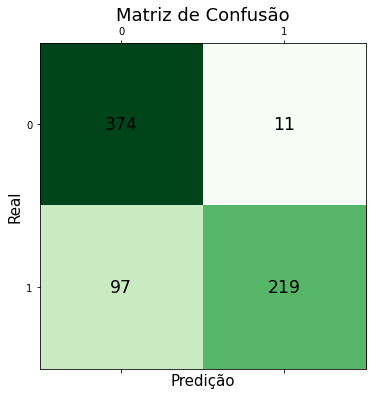

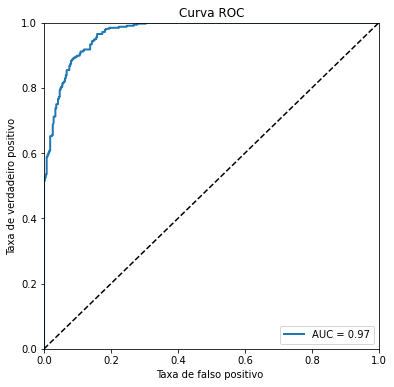

In [33]:
relatorio_mod1_itub4 = function.relatorio(mod1_itub4[0], target_itub4_teste,  mod1_itub4[1], '10d_mod1_itub4_svm.png', 'mtz_10d_mod1_itub4_svm.png')
relatorio_mod1_itub4

In [34]:
mod2_mglu3 = function.modelo_SVM(1.0, 'linear',1, indicadores_mglu3_treinamento, target_mglu3_treinamento, indicadores_mglu3_teste)
mod2_petr4 = function.modelo_SVM(1.0, 'linear',1, indicadores_petr4_treinamento, target_petr4_treinamento, indicadores_petr4_teste)
mod2_itub4 = function.modelo_SVM(1.0, 'linear',1, indicadores_itub4_treinamento, target_itub4_treinamento, indicadores_itub4_teste)

Falsos positivo - fp: 24
Verdadeiros positivo - tp: 397
Falsos negativo - fn: 49
Verdadeiros negativo  - tn: 236
Recall: 0.89
F1-score: 0.92
Precisão: 0.94
Acurácia: 0.9
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

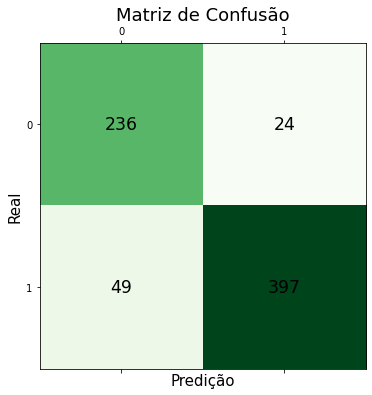

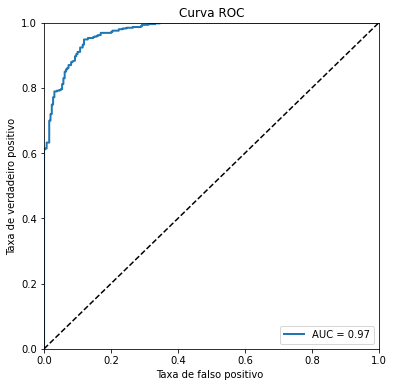

In [35]:
relatorio_mod2_mglu3 = function.relatorio(mod2_mglu3[0], target_mglu3_teste,  mod2_mglu3[1], '10d_mod2_mglu_svm.png', 'mtz_10d_mod2_mglu_svm.png')
relatorio_mod2_mglu3

Falsos positivo - fp: 14
Verdadeiros positivo - tp: 329
Falsos negativo - fn: 52
Verdadeiros negativo  - tn: 304
Recall: 0.86
F1-score: 0.91
Precisão: 0.96
Acurácia: 0.91
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

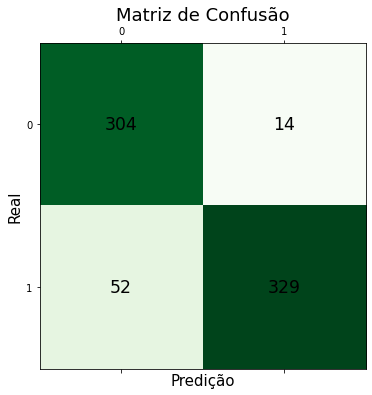

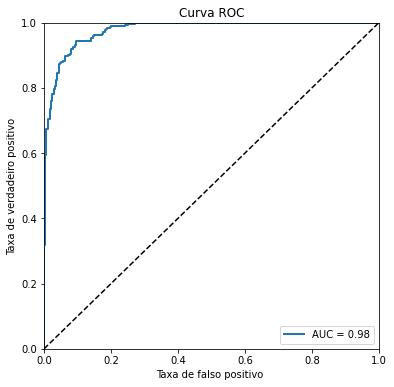

In [36]:
relatorio_mod2_petr4 = function.relatorio(mod2_petr4[0], target_petr4_teste,  mod2_petr4[1], '10d_mod2_petr_svm.png', 'mtz_10d_mod2_petr_svm.png')
relatorio_mod2_petr4

Falsos positivo - fp: 4
Verdadeiros positivo - tp: 177
Falsos negativo - fn: 139
Verdadeiros negativo  - tn: 381
Recall: 0.56
F1-score: 0.71
Precisão: 0.98
Acurácia: 0.8
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

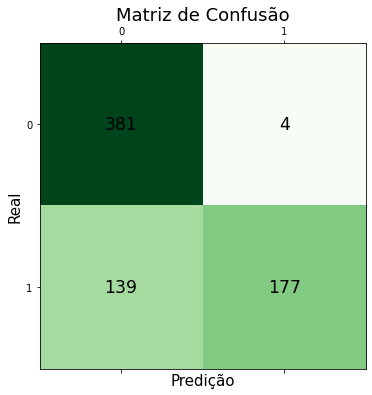

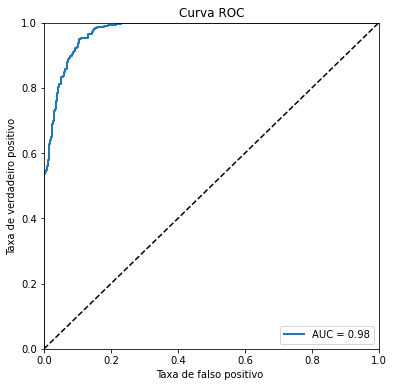

In [37]:
relatorio_mod2_itub4 = function.relatorio(mod2_itub4[0], target_itub4_teste,  mod2_itub4[1], '10d_mod2_itub_svm.png', 'mtz_10d_mod2_itub_svm.png')
relatorio_mod2_itub4

In [38]:
mod3_mglu3 = function.modelo_SVM(100, 'sigmoid',0.1, indicadores_mglu3_treinamento, target_mglu3_treinamento, indicadores_mglu3_teste)
mod3_petr4 = function.modelo_SVM(100, 'sigmoid',0.1, indicadores_petr4_treinamento, target_petr4_treinamento, indicadores_petr4_teste)
mod3_itub4 = function.modelo_SVM(100, 'sigmoid',0.1, indicadores_itub4_treinamento, target_itub4_treinamento, indicadores_itub4_teste)

Falsos positivo - fp: 48
Verdadeiros positivo - tp: 419
Falsos negativo - fn: 27
Verdadeiros negativo  - tn: 212
Recall: 0.94
F1-score: 0.92
Precisão: 0.9
Acurácia: 0.89
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

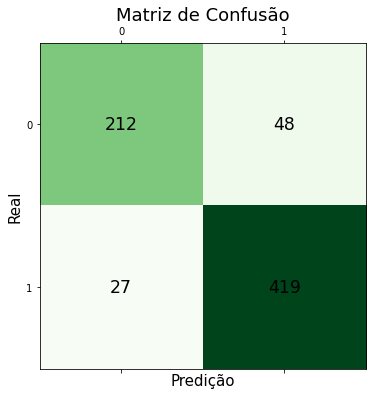

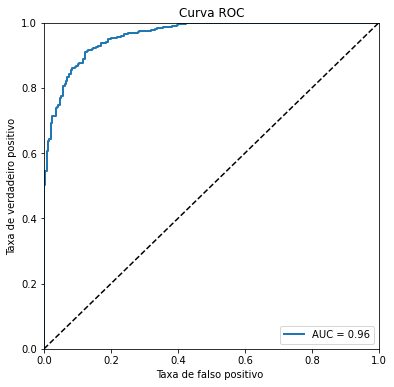

In [39]:
relatorio_mod3_mglu3 = function.relatorio(mod3_mglu3[0], target_mglu3_teste,  mod3_mglu3[1], '10d_mod3_mglu_svm.png', 'mtz_10d_mod3_mglu_svm.png')
relatorio_mod3_mglu3

Falsos positivo - fp: 10
Verdadeiros positivo - tp: 325
Falsos negativo - fn: 56
Verdadeiros negativo  - tn: 308
Recall: 0.85
F1-score: 0.91
Precisão: 0.97
Acurácia: 0.91
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

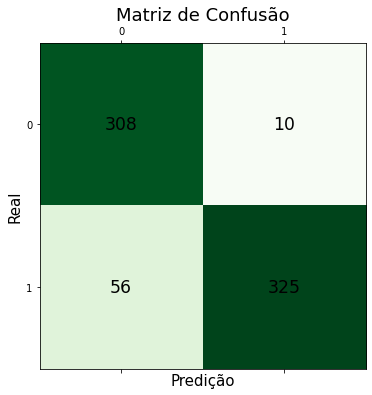

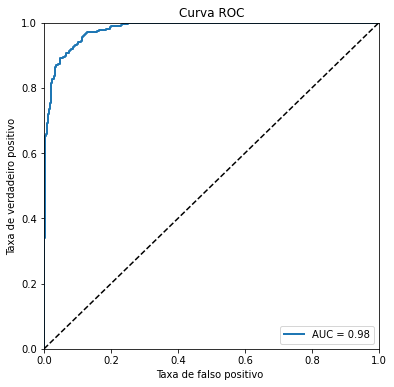

In [40]:
relatorio_mod3_petr4 = function.relatorio(mod3_petr4[0], target_petr4_teste,  mod3_petr4[1], '10d_mod3_petr_svm.png', 'mtz_10d_mod3_petr_svm.png')
relatorio_mod3_petr4

Falsos positivo - fp: 4
Verdadeiros positivo - tp: 173
Falsos negativo - fn: 143
Verdadeiros negativo  - tn: 381
Recall: 0.55
F1-score: 0.7
Precisão: 0.98
Acurácia: 0.79
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

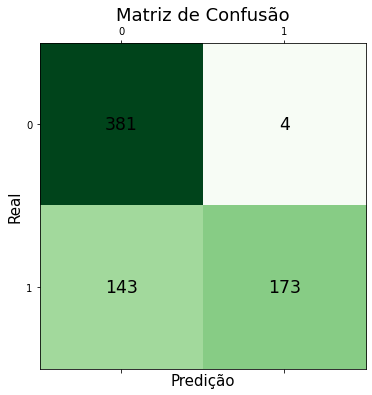

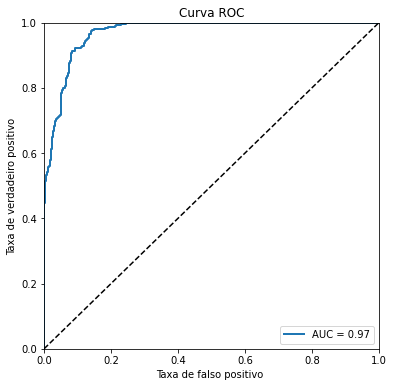

In [41]:
relatorio_mod3_itub4 = function.relatorio(mod3_itub4[0], target_itub4_teste,  mod3_itub4[1], '10d_mod3_itub_svm.png', 'mtz_10d_mod3_itub_svm.png')
relatorio_mod3_itub4

In [42]:
mod4_mglu3 = function.modelo_SVM(100, 'linear',1, indicadores_mglu3_treinamento, target_mglu3_treinamento, indicadores_mglu3_teste)
mod4_petr4 = function.modelo_SVM(100, 'linear',1, indicadores_petr4_treinamento, target_petr4_treinamento, indicadores_petr4_teste)
mod4_itub4 = function.modelo_SVM(100, 'linear',1, indicadores_itub4_treinamento, target_itub4_treinamento, indicadores_itub4_teste)

Falsos positivo - fp: 17
Verdadeiros positivo - tp: 377
Falsos negativo - fn: 69
Verdadeiros negativo  - tn: 243
Recall: 0.85
F1-score: 0.9
Precisão: 0.96
Acurácia: 0.88
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

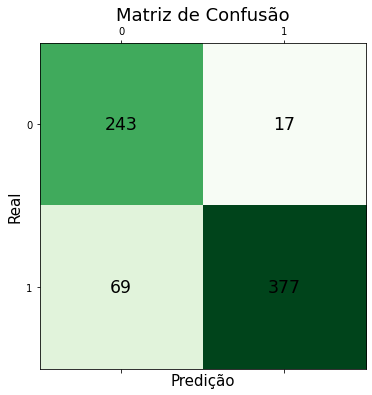

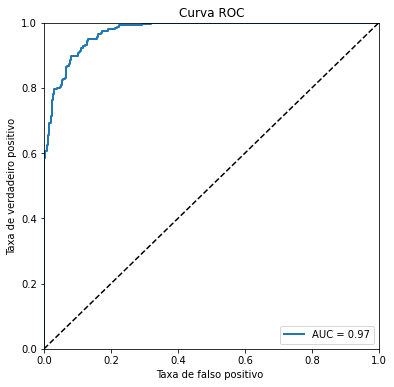

In [43]:
relatorio_mod4_mglu3 = function.relatorio(mod4_mglu3[0], target_mglu3_teste,  mod4_mglu3[1], '10d_mod4_mglu_svm.png', 'mtz_10d_mod4_mglu_svm.png')
relatorio_mod4_mglu3

Falsos positivo - fp: 7
Verdadeiros positivo - tp: 306
Falsos negativo - fn: 75
Verdadeiros negativo  - tn: 311
Recall: 0.8
F1-score: 0.88
Precisão: 0.98
Acurácia: 0.88
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

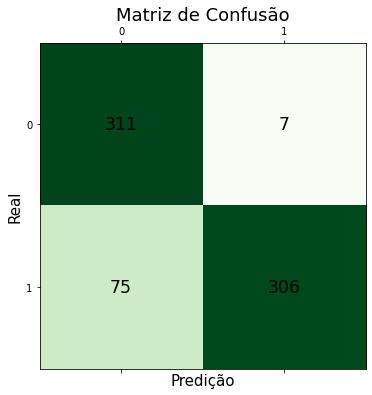

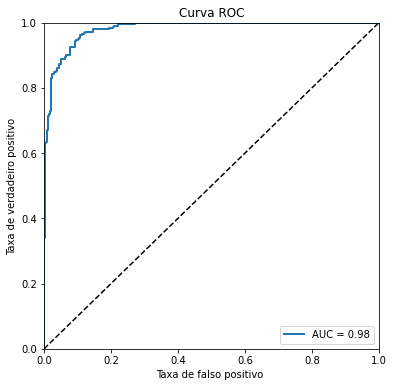

In [44]:
relatorio_mod4_petr4 = function.relatorio(mod4_petr4[0], target_petr4_teste,  mod4_petr4[1], '10d_mod4_petr_svm.png', 'mtz_10d_mod4_petr_svm.png')
relatorio_mod4_petr4

Falsos positivo - fp: 0
Verdadeiros positivo - tp: 140
Falsos negativo - fn: 176
Verdadeiros negativo  - tn: 385
Recall: 0.44
F1-score: 0.61
Precisão: 1.0
Acurácia: 0.75
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

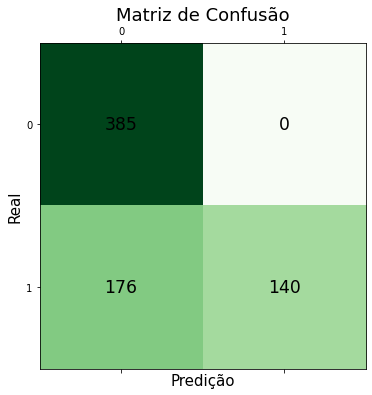

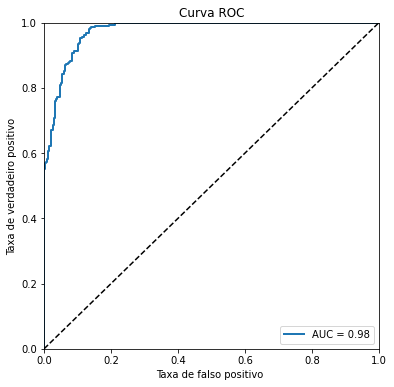

In [45]:
relatorio_mod4_itub4 = function.relatorio(mod4_itub4[0], target_itub4_teste,  mod4_itub4[1], '10d_mod4_itub_svm.png', 'mtz_10d_mod4_itub_svm.png')
relatorio_mod4_itub4

## LSTM

In [46]:
LSTM1_mglu3 = function.lstm1(indicadores_mglu3_treinamento, indicadores_mglu3_teste, target_mglu3_treinamento, target_mglu3_teste)

Resumo da Rede Neural:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/10
1648/1648 [==============================] - 5s 3ms/step - loss: 0.6523 - accuracy: 0.6456
Epoch 2/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.5076 - accuracy: 0.7791
Epoch 3/10
1648/1648 [==============================] - 4s 3ms/step - loss: 0.4144 - accuracy: 0.8240
Epoch 4/10
1648/1648 [==============================] - 4s 3ms/step - loss: 0.3723 - accuracy: 0.8416
Epoch 5/10
1648/1648 [=============

Falsos positivo - fp: 4
Verdadeiros positivo - tp: 302
Falsos negativo - fn: 144
Verdadeiros negativo  - tn: 256
Recall: 0.68
F1-score: 0.8
Precisão: 0.99
Acurácia: 0.79
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

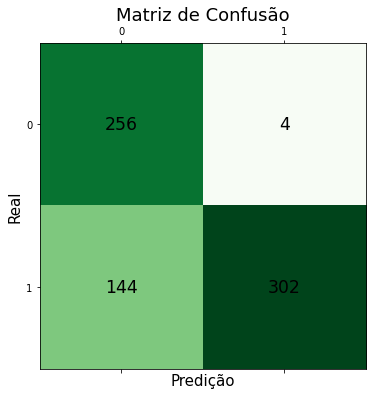

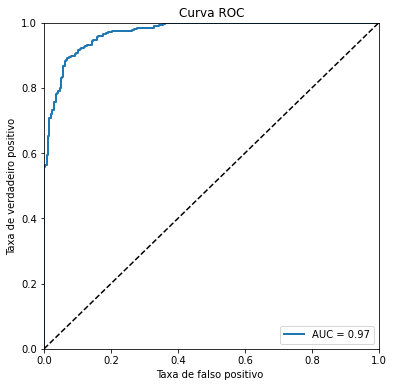

In [47]:
relatorio_LSTM1_mglu3 = function.relatorio_lstm(LSTM1_mglu3[0], target_mglu3_teste, LSTM1_mglu3[1], '10d_lstm1_mglu.png', 'mtz_10d_lstm1_mglu.png')
relatorio_LSTM1_mglu3

In [48]:
LSTM1_petr4 = function.lstm1(indicadores_petr4_treinamento, indicadores_petr4_teste, target_petr4_treinamento, target_petr4_teste)

Resumo da Rede Neural:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/10
1633/1633 [==============================] - 4s 3ms/step - loss: 0.6249 - accuracy: 0.6546
Epoch 2/10
1633/1633 [==============================] - 4s 3ms/step - loss: 0.4799 - accuracy: 0.7900
Epoch 3/10
1633/1633 [==============================] - 4s 2ms/step - loss: 0.4436 - accuracy: 0.7949
Epoch 4/10
1633/1633 [==============================] - 4s 3ms/step - loss: 0.4238 - accuracy: 0.8096
Epoch 5/10
1633/1633 [=============

Falsos positivo - fp: 47
Verdadeiros positivo - tp: 351
Falsos negativo - fn: 30
Verdadeiros negativo  - tn: 271
Recall: 0.92
F1-score: 0.9
Precisão: 0.88
Acurácia: 0.89
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

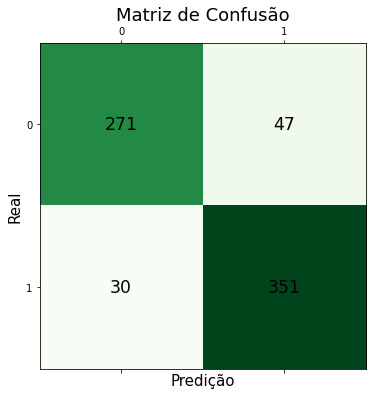

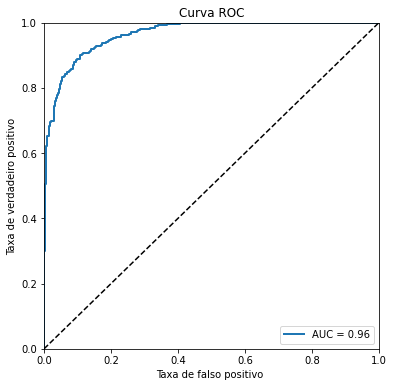

In [49]:
relatorio_LSTM1_petr4 = function.relatorio_lstm(LSTM1_petr4[0], target_petr4_teste, LSTM1_petr4[1], '10d_lstm1_petr.png', 'mtz_10d_lstm1_petr.png')
relatorio_LSTM1_petr4

In [50]:
LSTM1_itub4 = function.lstm1(indicadores_itub4_treinamento, indicadores_itub4_teste, target_itub4_treinamento, target_itub4_teste)

Resumo da Rede Neural:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/10
1636/1636 [==============================] - 4s 3ms/step - loss: 0.6535 - accuracy: 0.6394
Epoch 2/10
1636/1636 [==============================] - 4s 3ms/step - loss: 0.5099 - accuracy: 0.7671
Epoch 3/10
1636/1636 [==============================] - 4s 3ms/step - loss: 0.4418 - accuracy: 0.7989
Epoch 4/10
1636/1636 [==============================] - 4s 3ms/step - loss: 0.4175 - accuracy: 0.8111
Epoch 5/10
1636/1636 [=============

Falsos positivo - fp: 48
Verdadeiros positivo - tp: 305
Falsos negativo - fn: 11
Verdadeiros negativo  - tn: 337
Recall: 0.97
F1-score: 0.91
Precisão: 0.86
Acurácia: 0.92
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

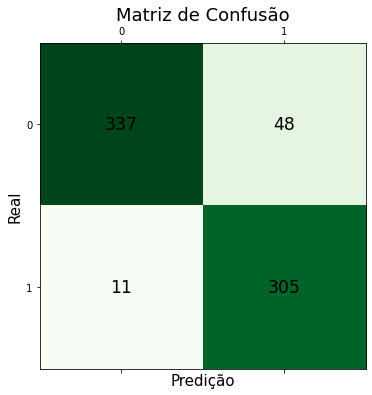

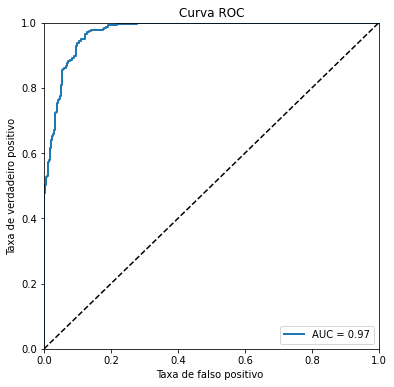

In [51]:
relatorio_LSTM1_itub4 = function.relatorio_lstm(LSTM1_itub4[0], target_itub4_teste, LSTM1_itub4[1], '10d_lstm1_itub.png', 'mtz_10d_lstm1_itub.png')
relatorio_LSTM1_itub4

In [52]:
LSTM2_mglu3 = function.lstm2(indicadores_mglu3_treinamento, indicadores_mglu3_teste, target_mglu3_treinamento, target_mglu3_teste)

Resumo da Rede Neural:
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 4, 50)             10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/170
1648/1648 [========================

Falsos positivo - fp: 4
Verdadeiros positivo - tp: 181
Falsos negativo - fn: 265
Verdadeiros negativo  - tn: 256
Recall: 0.41
F1-score: 0.57
Precisão: 0.98
Acurácia: 0.62
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

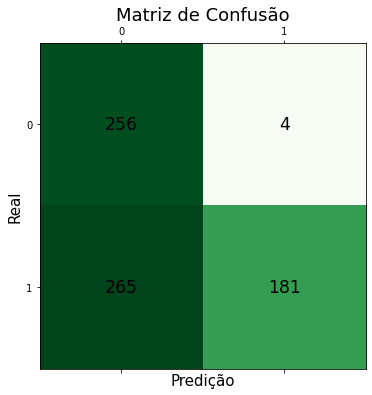

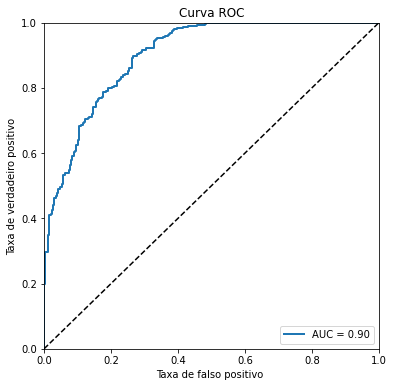

In [53]:
relatorio_LSTM2_mglu3 = function.relatorio_lstm(LSTM2_mglu3[0], target_mglu3_teste, LSTM2_mglu3[1], '10d_lstm2_mglu.png', 'mtz_10d_lstm2_mglu.png')
relatorio_LSTM2_mglu3

In [54]:
LSTM2_petr4 = function.lstm2(indicadores_petr4_treinamento, indicadores_petr4_teste, target_petr4_treinamento, target_petr4_teste)

Resumo da Rede Neural:
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 4, 50)             10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/170
1633/1633 [========================

Falsos positivo - fp: 8
Verdadeiros positivo - tp: 302
Falsos negativo - fn: 79
Verdadeiros negativo  - tn: 310
Recall: 0.79
F1-score: 0.87
Precisão: 0.97
Acurácia: 0.88
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

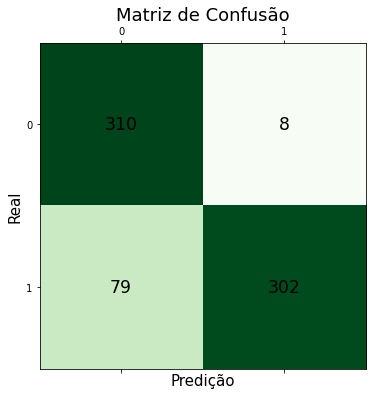

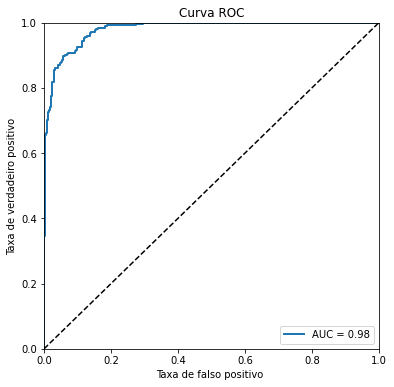

In [55]:
relatorio_LSTM2_petr4 = function.relatorio_lstm(LSTM2_petr4[0], target_petr4_teste, LSTM2_petr4[1], '10d_lstm2_petr.png', 'mtz_10d_lstm2_petr.png')
relatorio_LSTM2_petr4

In [56]:
LSTM2_itub4 = function.lstm2(indicadores_itub4_treinamento, indicadores_itub4_teste, target_itub4_treinamento, target_itub4_teste)

Resumo da Rede Neural:
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 4, 50)             10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 50)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/170
1636/1636 [========================

Falsos positivo - fp: 0
Verdadeiros positivo - tp: 149
Falsos negativo - fn: 167
Verdadeiros negativo  - tn: 385
Recall: 0.47
F1-score: 0.64
Precisão: 1.0
Acurácia: 0.76
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

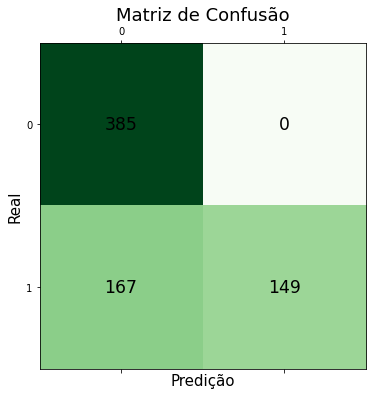

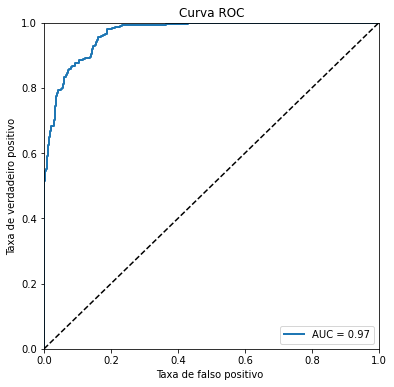

In [57]:
relatorio_LSTM2_itub4 = function.relatorio_lstm(LSTM2_itub4[0], target_itub4_teste, LSTM2_itub4[1], '10d_lstm2_itub.png', 'mtz_10d_lstm2_itub.png')
relatorio_LSTM2_itub4

In [58]:
LSTM3_mglu3 = function.lstm3(indicadores_mglu3_treinamento, indicadores_mglu3_teste, target_mglu3_treinamento, target_mglu3_teste)

Resumo da Rede Neural:
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 4, 12)             672       
_________________________________________________________________
lstm_11 (LSTM)               (None, 8)                 672       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,353
Trainable params: 1,353
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/10
1648/1648 [==============================] - 7s 4ms/step - loss: 0.6847 - accuracy: 0.5643
Epoch 2/10
1648/1648 [==============================] - 6s 4ms/step - loss: 0.6154 - accuracy: 0.6814
Epoch 3/10
1648/1648 [==============================] - 6s 4ms/step - loss: 0.4645 - accuracy: 0.8064
Epoch 4

Falsos positivo - fp: 43
Verdadeiros positivo - tp: 430
Falsos negativo - fn: 16
Verdadeiros negativo  - tn: 217
Recall: 0.96
F1-score: 0.94
Precisão: 0.91
Acurácia: 0.92
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

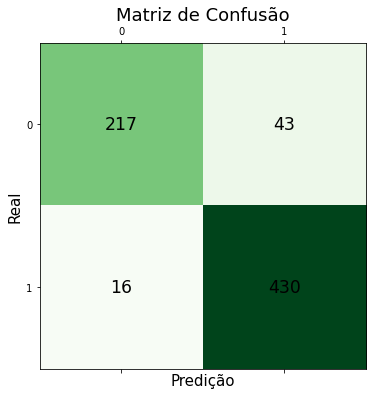

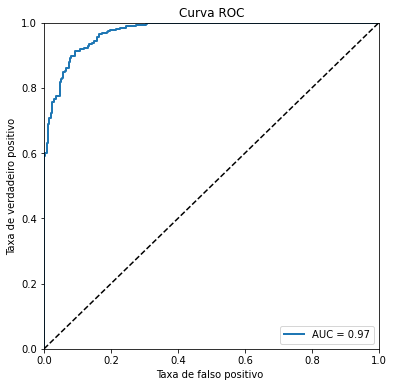

In [59]:
relatorio_LSTM3_mglu3 = function.relatorio_lstm(LSTM3_mglu3[0], target_mglu3_teste, LSTM3_mglu3[1], '10d_lstm3_mglu.png', 'mtz_10d_lstm3_mglu.png')
relatorio_LSTM3_mglu3

In [60]:
LSTM3_petr4 = function.lstm3(indicadores_petr4_treinamento, indicadores_petr4_teste, target_petr4_treinamento, target_petr4_teste)

Resumo da Rede Neural:
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 4, 12)             672       
_________________________________________________________________
lstm_13 (LSTM)               (None, 8)                 672       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 1,353
Trainable params: 1,353
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/10
1633/1633 [==============================] - 7s 4ms/step - loss: 0.6774 - accuracy: 0.5885
Epoch 2/10
1633/1633 [==============================] - 6s 4ms/step - loss: 0.4735 - accuracy: 0.7900
Epoch 3/10
1633/1633 [==============================] - 6s 4ms/step - loss: 0.3997 - accuracy: 0.8316
Epoch 4

Falsos positivo - fp: 13
Verdadeiros positivo - tp: 315
Falsos negativo - fn: 66
Verdadeiros negativo  - tn: 305
Recall: 0.83
F1-score: 0.89
Precisão: 0.96
Acurácia: 0.89
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

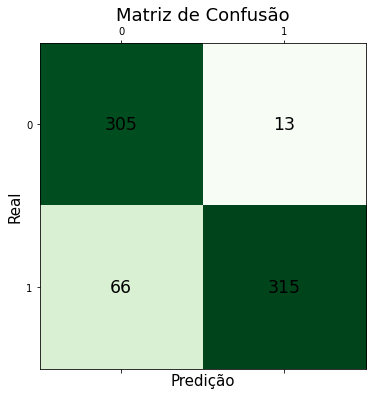

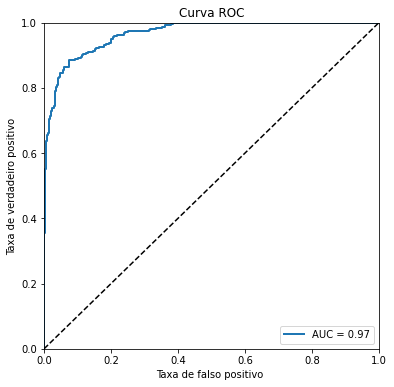

In [61]:
relatorio_LSTM3_petr4 = function.relatorio_lstm(LSTM3_petr4[0], target_petr4_teste, LSTM3_petr4[1], '10d_lstm3_petr4.png', 'mtz_10d_lstm3_petr4.png')
relatorio_LSTM3_petr4

In [62]:
LSTM3_itub4 = function.lstm3(indicadores_itub4_treinamento, indicadores_itub4_teste, target_itub4_treinamento, target_itub4_teste)

Resumo da Rede Neural:
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 4, 12)             672       
_________________________________________________________________
lstm_15 (LSTM)               (None, 8)                 672       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 1,353
Trainable params: 1,353
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/10
1636/1636 [==============================] - 7s 4ms/step - loss: 0.6845 - accuracy: 0.5795
Epoch 2/10
1636/1636 [==============================] - 7s 4ms/step - loss: 0.5906 - accuracy: 0.6907
Epoch 3/10
1636/1636 [==============================] - 7s 4ms/step - loss: 0.4486 - accuracy: 0.7977
Epoch 4

Falsos positivo - fp: 0
Verdadeiros positivo - tp: 128
Falsos negativo - fn: 188
Verdadeiros negativo  - tn: 385
Recall: 0.41
F1-score: 0.58
Precisão: 1.0
Acurácia: 0.73
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

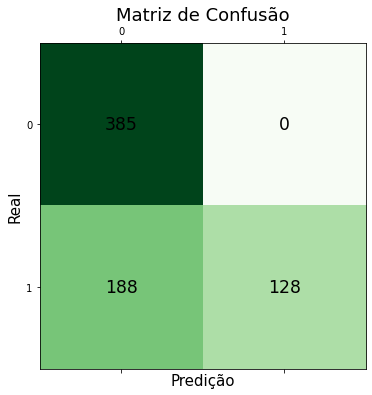

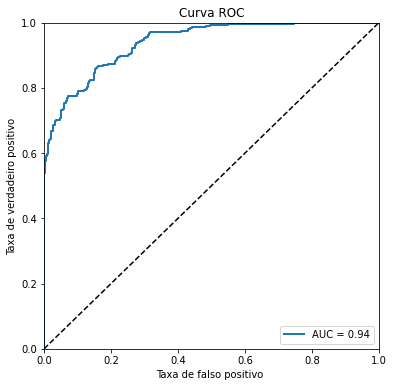

In [63]:
relatorio_LSTM3_itub4 = function.relatorio_lstm(LSTM3_itub4[0], target_itub4_teste, LSTM3_itub4[1], '10d_lstm3_itub.png', 'mtz_10d_lstm3_itub.png')
relatorio_LSTM3_itub4 

In [64]:
LSTM4_mglu3 = function.lstm4(indicadores_mglu3_treinamento, indicadores_mglu3_teste, target_mglu3_treinamento, target_mglu3_teste)

Resumo da Rede Neural:
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 30)                3840      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 31        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/10
1648/1648 [==============================] - 4s 3ms/step - loss: 0.6614 - accuracy: 0.6220
Epoch 2/10
1648/1648 [==============================] - 4s 3ms/step - loss: 0.5686 - accuracy: 0.7209
Epoch 3/10
1648/1648 [==============================] - 5s 3ms/step - loss: 0.4417 - accuracy: 0.8149
Epoch 4/10
1648/1648 [==============================] - 5s 3ms/step - loss: 0.4015 - accuracy: 0.8271
Epoch 5/10
1648/1648 [==============

Falsos positivo - fp: 99
Verdadeiros positivo - tp: 443
Falsos negativo - fn: 3
Verdadeiros negativo  - tn: 161
Recall: 0.99
F1-score: 0.9
Precisão: 0.82
Acurácia: 0.86
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

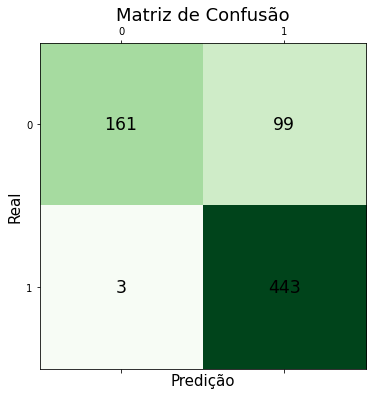

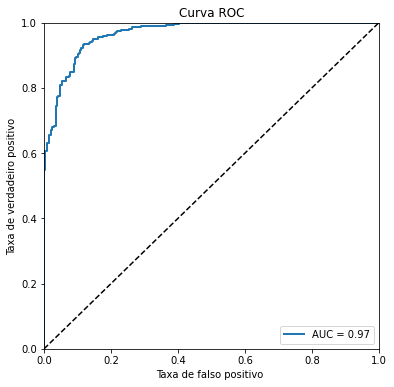

In [65]:
relatorio_LSTM4_mglu3 = function.relatorio_lstm(LSTM4_mglu3[0], target_mglu3_teste, LSTM4_mglu3[1], '10d_lstm4_mglu.png', 'mtz_10d_lstm4_mglu.png')
relatorio_LSTM4_mglu3

In [66]:
LSTM4_petr4 = function.lstm4(indicadores_petr4_treinamento, indicadores_petr4_teste, target_petr4_treinamento, target_petr4_teste)

Resumo da Rede Neural:
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 30)                3840      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/10
1633/1633 [==============================] - 4s 3ms/step - loss: 0.6323 - accuracy: 0.6522
Epoch 2/10
1633/1633 [==============================] - 4s 3ms/step - loss: 0.4833 - accuracy: 0.7844
Epoch 3/10
1633/1633 [==============================] - 4s 2ms/step - loss: 0.4475 - accuracy: 0.7924
Epoch 4/10
1633/1633 [==============================] - 4s 2ms/step - loss: 0.4211 - accuracy: 0.8065
Epoch 5/10
1633/1633 [==============

Falsos positivo - fp: 91
Verdadeiros positivo - tp: 369
Falsos negativo - fn: 12
Verdadeiros negativo  - tn: 227
Recall: 0.97
F1-score: 0.88
Precisão: 0.8
Acurácia: 0.85
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

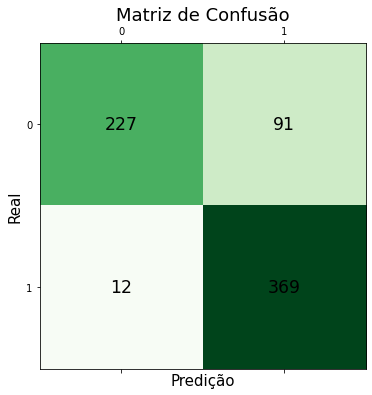

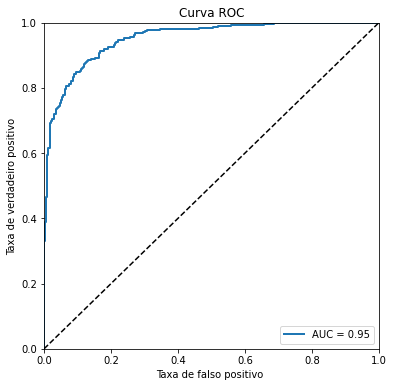

In [67]:
relatorio_LSTM4_petr4 = function.relatorio_lstm(LSTM4_petr4[0], target_petr4_teste, LSTM4_petr4[1], '10d_lstm4_petr.png', 'mtz_10d_lstm4_petr.png')
relatorio_LSTM4_petr4

In [68]:
LSTM4_itub4 = function.lstm4(indicadores_itub4_treinamento, indicadores_itub4_teste, target_itub4_treinamento, target_itub4_teste)

Resumo da Rede Neural:
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 30)                3840      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 31        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________
---------------------------------------------
Epoch 1/10
1636/1636 [==============================] - 4s 3ms/step - loss: 0.6575 - accuracy: 0.6302
Epoch 2/10
1636/1636 [==============================] - 4s 2ms/step - loss: 0.5266 - accuracy: 0.7653
Epoch 3/10
1636/1636 [==============================] - 4s 2ms/step - loss: 0.4417 - accuracy: 0.8032
Epoch 4/10
1636/1636 [==============================] - 4s 2ms/step - loss: 0.4223 - accuracy: 0.8007
Epoch 5/10
1636/1636 [==============

Falsos positivo - fp: 1
Verdadeiros positivo - tp: 171
Falsos negativo - fn: 145
Verdadeiros negativo  - tn: 384
Recall: 0.54
F1-score: 0.7
Precisão: 0.99
Acurácia: 0.79
---------------------------------------------
---------------------------------------------


(<Figure size 432x432 with 1 Axes>, <Figure size 432x432 with 1 Axes>)

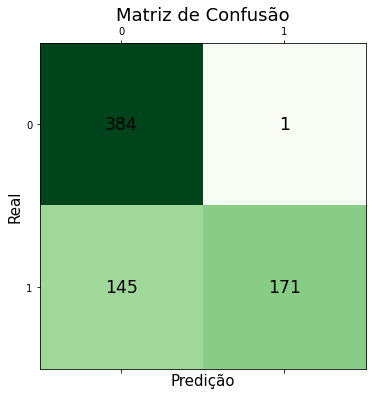

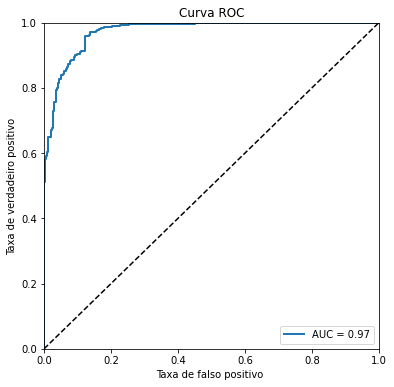

In [69]:
relatorio_LSTM4_itub4 = function.relatorio_lstm(LSTM4_itub4[0], target_itub4_teste, LSTM4_itub4[1], '10d_lstm4_itub.png', 'mtz_10d_lstm4_itub.png')
relatorio_LSTM4_itub4